In [1]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.patches as mpatches
sns.set_style("ticks")
sns.set_context("poster")

from synexp import *
from viz import *


/Users/lguerdan/.virtualenvs/10701-Project/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# params = {'legend.fontsize': 'x-large',
#          'axes.labelsize': 'medium',
#          'axes.titlesize':'x-large',
#          'xtick.labelsize':'medium',
#          'ytick.labelsize':'medium'}
# pylab.rcParams.update(params)

In [3]:
X, Y, error_params = generate_syn_data(
    NS=70,
    K=1,
    y0_pdf='2D_linsep_baseline',
    y1_pdf='2D_linsep_intervention',
    pi_pdf='6cov_linsep',
    alpha_0=0,
    alpha_1=0,
    beta_0=0,
    beta_1=0,
    shuffle=True
)

Text(0.5, 0, '$X_1$')

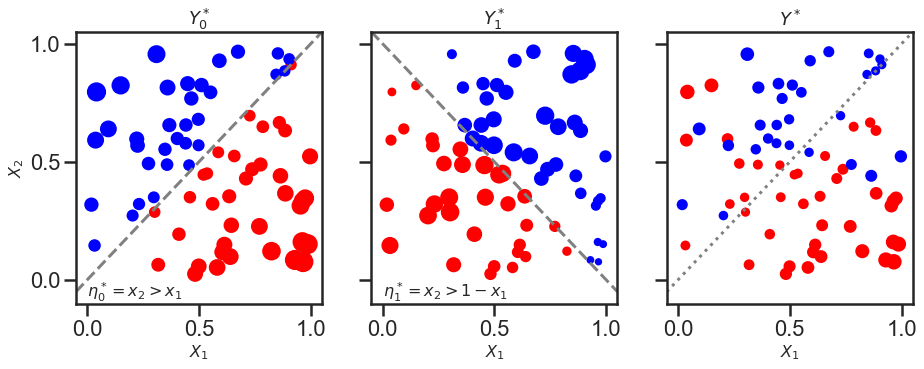

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

neg_baseline_X = X[Y['YS_0'] == 0]
pos_baseline_X = X[Y['YS_0'] == 1]
neg_baseline_Y = Y[Y['YS_0'] == 0]
pos_baseline_Y = Y[Y['YS_0'] == 1]

axes[0].axline((0, 0), slope=1, color='grey', linestyle='--')
axes[0].scatter(neg_baseline_X[[0]], neg_baseline_X[[1]], color='red', marker='o',  s=(18*(3.3*(1-neg_baseline_Y['pD']))**3.2))
axes[0].scatter(pos_baseline_X[[0]], pos_baseline_X[[1]], color='blue',marker='o', s=(18*(3.3*(1-pos_baseline_Y['pD']))**3.2))
axes[0].set_title('$Y^*_0$', fontsize=18)
axes[0].text(0, -.07, '$\eta^*_0 = x_2 > x_1$', fontsize = 16)
axes[0].set_ylim([-.1, 1.05])
axes[0].set_ylabel('$X_2$', fontsize=16)
axes[0].set_xlim([-.05, 1.05])
axes[0].set_xlabel('$X_1$', fontsize=16)
axes[0].set_yticks([0, .5, 1])

# plt.figure()
neg_intervention_X = X[Y['YS_1'] == 0]
pos_intervention_X = X[Y['YS_1'] == 1]
neg_intervention_Y = Y[Y['YS_1'] == 0]
pos_intervention_Y = Y[Y['YS_1'] == 1]
axes[1].axline((1, 0), slope=-1, color='grey', linestyle='--')
axes[1].scatter(neg_intervention_X[[0]], neg_intervention_X[[1]], color='red', marker='o', s=18*(5*neg_intervention_Y['pD'])**3)
axes[1].scatter(pos_intervention_X[[0]], pos_intervention_X[[1]], color='blue', marker='o', s=18*(5*pos_intervention_Y['pD'])**3)
axes[1].set_title('$Y^*_1$', fontsize=18)
axes[1].text(0, -.07, '$\eta^*_1 = x_2 > 1 - x_1$', fontsize = 16)
axes[1].set_ylim([-.1, 1.05])
axes[1].set_xlim([-.05, 1.05])
axes[1].set_xlabel('$X_1$', fontsize=16)




X_neg_obs = X[((Y['D'] == 0) & (Y['YS_0'] == 0)) | ((Y['D'] == 1) & (Y['YS_1'] == 0))]
X_pos_obs = X[((Y['D'] == 0) & (Y['YS_0'] == 1)) | ((Y['D'] == 1) & (Y['YS_1'] == 1))]

Y_neg_neg = Y[((Y['D'] == 0) & (Y['YS_0'] == 0)) | ((Y['D'] == 1) & (Y['YS_1'] == 0))]
Y_pos_obs = Y[((Y['D'] == 0) & (Y['YS_0'] == 1)) | ((Y['D'] == 1) & (Y['YS_1'] == 1))]

axes[2].axline((0, 0), slope=1, color='grey', linestyle=':')
axes[2].scatter(X_neg_obs[[0]], X_neg_obs[[1]], color='red', marker='o', s=(15*(3*(1-Y_neg_neg['pD']))**3))
axes[2].scatter(X_pos_obs[[0]], X_pos_obs[[1]], color='blue',marker='o',s=(15*(3*(1-Y_pos_obs['pD']))**3))

# axes[2].scatter(neg_intervention_X[[0]], neg_intervention_X[[1]], color='red', marker='x', s=18*(5*neg_intervention_Y['pD'])**3)
# axes[2].scatter(pos_intervention_X[[0]], pos_intervention_X[[1]], color='blue', marker='x', s=18*(5*pos_intervention_Y['pD'])**3)
axes[2].set_title('$Y^*$', fontsize=18)
axes[2].set_ylim([-.1, 1.05])
axes[2].set_xlim([-.05, 1.05])
axes[2].set_xlabel('$X_1$', fontsize=16)



## Synthetic environment setup

In [9]:
x = np.random.uniform(low=0, high=1, size=(10000, 6))

pid = pi(x, func='6cov_linsep')



0.1236
1.0


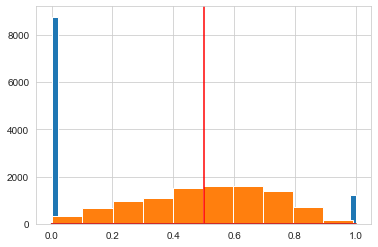

In [19]:
x = np.random.uniform(low=0, high=1, size=(10000, 6))
# eta_star_0 = eta(x, environment='shalt_6cov_baseline')
# eta_star_1 = eta(x, environment='shalt_6cov_intervention')

def eta0(x):
    return .8* (.25 *(1+np.sin(1.5*x[:,0]))*(1-np.cos(3.9*np.maximum(.85*x[:,2],.7*x[:,3])))) + .2 * (4*np.power((x[:,1]-.5), 2))
#     return (1/3.35054) * np.sin(x[:,4])*((4*np.power(np.maximum(x[:,0], x[:,5]), 3))/(1+2*np.power(x[:,2], 2)))

def eta1(x):
    return 1-np.power(x[:,0], 6)

def etat(x):
    y = np.zeros(x.shape[0])
    y[x[:,1] > (x[:,0] + 0.5)] = 1
    return y

def pi(x):
    return .6*x.mean(axis=1) +.1

px = etat(x)

plt.hist(px, bins=50)
plt.axvline(x=.5, color='r')
print((px > .5).mean())
print(px.max())

x = np.random.uniform(low=0, high=1, size=(10000, 6))
plt.hist(eta0(x))

x = np.linspace(0,1, 2000)
plt.plot(x, .5 *(1+np.sin(x)))
plt.plot(x, 1-np.power(x, 3))
# np.sin(x[:,0])



# X, Y, error_params = generate_syn_data_pdfviz(
#     10000,
#     eta0, 
#     eta1,
#     pi_pdf=PI_PDF,
#     alpha_0=0.1,
#     alpha_1=0,
#     beta_0=0.1,
#     beta_1=0,
#     shuffle=True
# )


# YS = np.ones(10000)
# YS[Y['D']==0] = Y['pYS_0'][Y['D']==0]
# YS[Y['D']==1] = Y['pYS_1'][Y['D']==1]

# yhat = YS>.5
# y = Y['YS_0']
# (yhat == y).mean()


## Experiment: comparison among baselines

In [40]:
r1df = pd.read_csv('results/2-2-main_exp_results.csv')
r2df = pd.read_csv('results/exp1_grid_results_NR=10_NS=10000_E=40.csv')


resdf = pd.concat([r1df, r2df])
means = resdf.groupby(['alpha', 'beta', 'model']).mean()['ACC']
print(means.to_latex())

stds = resdf.groupby(['alpha', 'beta', 'model']).std()['ACC']
print(stds.to_latex())


\begin{tabular}{lllr}
\toprule
    &     &                  &       ACC \\
alpha & beta & model &           \\
\midrule
0.0 & 0.0 & Conditional outcome &  0.756200 \\
    &     & Conditional outcome (SL) &  0.771900 \\
    &     & Observational &  0.556967 \\
    &     & Proxy PO Oracle &  0.755400 \\
    &     & Target PO Oracle &  0.726600 \\
0.1 & 0.3 & Conditional outcome &  0.630800 \\
    &     & Conditional outcome (SL) &  0.762400 \\
    &     & Observational &  0.545800 \\
    &     & Proxy PO Oracle &  0.658467 \\
    &     & Target PO Oracle &  0.757900 \\
0.2 & 0.2 & Conditional outcome &  0.721467 \\
    &     & Conditional outcome (SL) &  0.693050 \\
    &     & Observational &  0.537733 \\
    &     & Proxy PO Oracle &  0.754067 \\
    &     & Target PO Oracle &  0.707783 \\
0.3 & 0.1 & Conditional outcome &  0.679267 \\
    &     & Conditional outcome (SL) &  0.730867 \\
    &     & Observational &  0.585333 \\
    &     & Proxy PO Oracle &  0.646400 \\
    &     & Targ

/var/folders/w_/rwxvw5hn1ng2qvm6353gkvqw0000gr/T/ipykernel_2952/2909102595.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(means.to_latex())
/var/folders/w_/rwxvw5hn1ng2qvm6353gkvqw0000gr/T/ipykernel_2952/2909102595.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(stds.to_latex())


## Main Experiment: parameter estimation via CCPE

In [11]:
SAMPLE_SIZES = [2000, 4000, 6000, 8000, 10000]
env = {
    'Y0_PDF': '2D_linsep_intervention',
    'Y1_PDF': '2D_linsep_baseline',
    'PI_PDF': '6cov_linear'
}
configs=[{
    'alpha': .1,
    'beta': .3
},{
    'alpha': .2,
    'beta': .2
},{
    'alpha': .3,
    'beta': .1
}]
ccperesults = ccpe_benchmark_exp(env, configs, SAMPLE_SIZES, N_RUNS=20, n_epochs=20)

NS: [10000, 20000], alpha: 0.2, beta: 0.2



Target: Y|D: 100%|██████████████████████████████| 20/20 [00:15<00:00,  1.33it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:16<00:00,  1.23it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:15<00:00,  1.29it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:17<00:00,  1.16it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:16<00:00,  1.23it/s]


NS: [10000, 20000], alpha: 0.2, beta: 0.2



Target: Y|D: 100%|██████████████████████████████| 20/20 [00:22<00:00,  1.12s/it]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:19<00:00,  1.03it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:18<00:00,  1.06it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:17<00:00,  1.16it/s]
Target: Y|D: 100%|██████████████████████████████| 20/20 [00:17<00:00,  1.17it/s]


In [12]:
pd.DataFrame(ccperesults).groupby('NS').mean()

,alpha,beta,alpha_hat,beta_hat,alpha_error,beta_error
NS,,,,,,
10000,0.2,0.2,0.181035,0.212469,-0.018965,0.012469
20000,0.2,0.2,0.133589,0.143278,-0.066411,-0.056722


In [10]:
pd.DataFrame(ccperesults).groupby('NS').mean()

,alpha,beta,alpha_hat,beta_hat,alpha_error,beta_error
NS,,,,,,
10000,0.2,0.2,0.223990,0.220720,0.023990,0.020720
20000,0.2,0.2,0.168013,0.252069,-0.031987,0.052069


In [7]:
pd.DataFrame(ccperesults).groupby('NS').mean()

,alpha,beta,alpha_hat,beta_hat,alpha_error,beta_error
NS,,,,,,
1000,0.2,0.2,0.216135,0.215559,0.016135,0.015559
2000,0.2,0.2,0.239689,0.253541,0.039689,0.053541
3000,0.2,0.2,0.067628,0.151977,-0.132372,-0.048023
4000,0.2,0.2,0.148458,0.226702,-0.051542,0.026702
5000,0.2,0.2,0.078935,0.118839,-0.121065,-0.081161


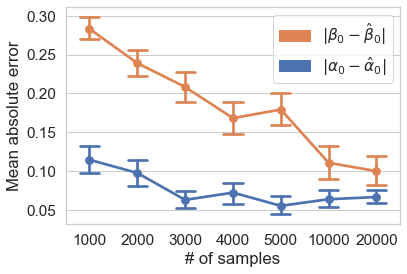

In [57]:
result_df = pd.read_csv('results/R7_K=1_N_RUNS=150_n_epochs=30_d0.csv')
result_df = result_df[result_df['aggregate'] == False]

sns.set(font_scale=1.8)
sns.set_theme(style="whitegrid", 
              palette=sns.color_palette(), 
              font_scale=1.4)

g = sns.pointplot(
    data=result_df,
    x='NS',
    y='error',
    hue='parameter',
    capsize=.4,
    legend=True,
    errorbar="se"
)
g.set(xlabel='# of samples', ylabel='Mean absolute error')
black_patch = mpatches.Patch(color=sns.color_palette()[1], label=r'$|\beta_0 - \hat{\beta}_0|$')
red_patch = mpatches.Patch(color=sns.color_palette()[0], label=r'$|\alpha_0 - \hat{\alpha}_0|$')

plt.legend(handles=[black_patch, red_patch])

plt.savefig('figs/estimation_error.png', dpi=500, bbox_inches='tight')


## Experiment: Robustness to parameter estimation Error

In [5]:
params = np.array([0, .2, .4])
errors = np.array([-.2, -.15, -.1, -.05, 0, .05, .1, .15, .2])
configs = []

for param in params: 
    for error in errors:
        estimate = round(param+error, 2)
        if estimate>=0 and estimate<=.5:
            configs.append({
                'param': param,
                'estimate': estimate
            })

exp_results = run_estimation_error_exp(do=0, param_configs=configs, error_param='alpha',
                                       NS=5000, N_RUNS=1, n_epochs=5, train_ratio=.7)

surroate params {'alpha': 0.0, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.39it/s]


surroate params {'alpha': 0.05, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.43it/s]


surroate params {'alpha': 0.1, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.24it/s]


surroate params {'alpha': 0.15, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:05<00:00,  1.07s/it]


surroate params {'alpha': 0.2, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.30it/s]


surroate params {'alpha': 0.0, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:05<00:00,  1.05s/it]


surroate params {'alpha': 0.05, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.24it/s]


surroate params {'alpha': 0.1, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.06it/s]


surroate params {'alpha': 0.15, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.29it/s]


surroate params {'alpha': 0.2, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.35it/s]


surroate params {'alpha': 0.25, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.34it/s]


surroate params {'alpha': 0.3, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.38it/s]


surroate params {'alpha': 0.35, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.40it/s]


surroate params {'alpha': 0.4, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.42it/s]


surroate params {'alpha': 0.2, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.44it/s]


surroate params {'alpha': 0.25, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.27it/s]


surroate params {'alpha': 0.3, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.34it/s]


surroate params {'alpha': 0.35, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.33it/s]


surroate params {'alpha': 0.4, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.35it/s]


surroate params {'alpha': 0.45, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.44it/s]


surroate params {'alpha': 0.5, 'beta': 0}


Target: Y0: 100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.48it/s]


## Experiment 3 - Robustness plots 

In [2]:
alpha_robustness_results = pd.read_csv('results/alpha_stress_tests.csv')
beta_robustness_results = pd.read_csv('results/beta_stress_tests.csv')
# beta_robustness_results['parameter'] = 'beta'
alpha_robustness_results['bias'] = (alpha_robustness_results['alpha_hat'] - alpha_robustness_results['alpha']).round(decimals=2)
beta_robustness_results['bias'] = (beta_robustness_results['beta_hat'] - beta_robustness_results['beta']).round(decimals=2)
robustness_results = pd.concat([alpha_robustness_results, beta_robustness_results])

alpha_robustness_results = alpha_robustness_results[alpha_robustness_results['alpha'] > 0]
beta_robustness_results = beta_robustness_results[beta_robustness_results['beta'] > 0]



<Figure size 720x360 with 0 Axes>

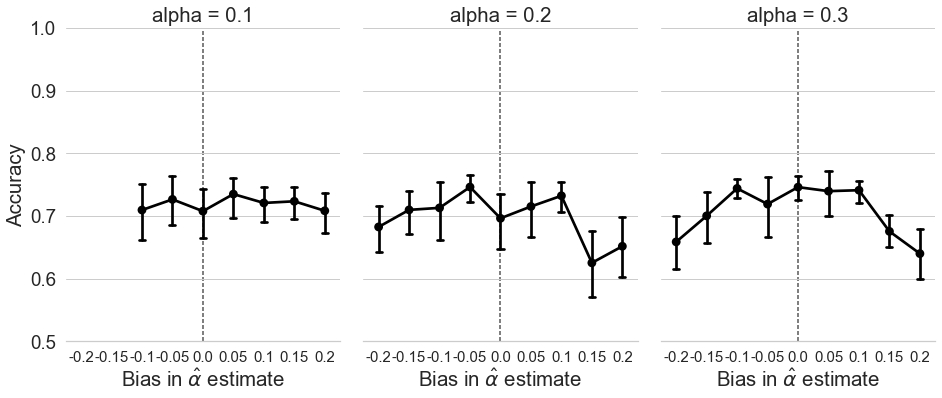

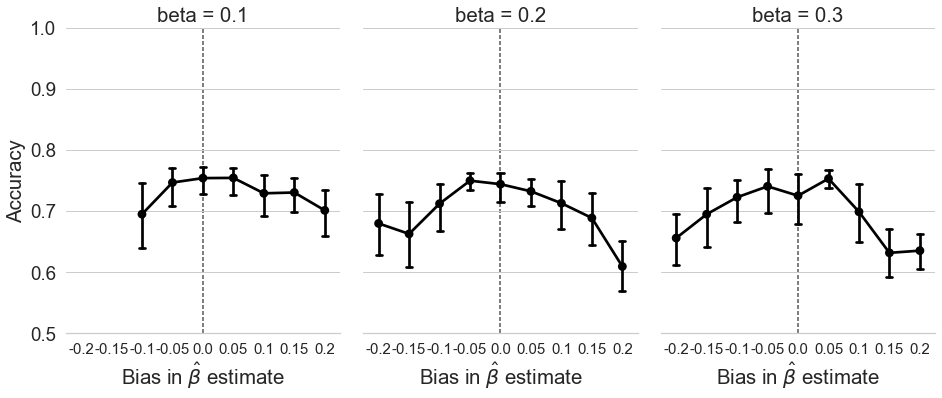

In [35]:
import matplotlib.ticker as tkr
sns.set_theme(style="whitegrid", 
              palette=sns.color_palette(), 
              font_scale=1.7)

# Draw a pointplot to show pulse as a function of three categorical factors
plt.figure(figsize=(10,5))
g = sns.catplot(
    data=alpha_robustness_results, x="bias", y="ACC",  col="alpha",  capsize=.2, 
    kind="point", height=6, aspect=.75, color="black"
)
g.despine(left=True)
g.set(ylim=(.5, 1), ylabel='Accuracy', xlabel=r'Bias in $\hat{\alpha}$ estimate')
g.map(plt.axvline, x=4, color='grey', dashes=(2, 1), zorder=0,linewidth=2)

for ax in g.axes.flat:
    ax.tick_params(axis='x', labelsize=15)


plt.savefig('alpha_errors.png', dpi=400)


    
# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(
    data=beta_robustness_results, x="bias", y="ACC",  col="beta",  capsize=.2, 
    kind="point", height=6, aspect=.75, color="black"
)
g.despine(left=True)
g.set(ylim=(.5, 1), ylabel='Accuracy', xlabel=r'Bias in $\hat{\beta}$ estimate')
g.map(plt.axvline, x=4, color='grey', dashes=(2, 1), zorder=0,linewidth=2)

for ax in g.axes.flat:
    ax.tick_params(axis='x', labelsize=15)

    
plt.savefig('beta_errors.png', dpi=400)


## Debugging baselines

In [ ]:
compare
alpha:0, beta:0 [looks good]
alpha:.1, beta.3 [looks good]
alpha:.2, beta:.2
alpha:.3, beta.1 [looks good]


In [7]:
## Main Experiment: troubleshoot baselines
    
    
Y0_PDF = 'piecewise_sinusoid'
Y1_PDF = 'low_base_rate_sinusoid'
PI_PDF = 'linear'
do=0

expdf, error_params = generate_syn_data(
    NS=10000,
    K=1,
    y0_pdf=Y0_PDF,
    y1_pdf=Y1_PDF,
    pi_pdf=PI_PDF,
    alpha_min=0.1,
    alpha_max=0.11,
    beta_min=0.3,
    beta_max=0.31,
    shuffle=True
)

baseline1 = {
    'model': 'Conditional outcome',
    'target': 'Y0'
}

baseline2 = {
    'model': 'Conditional outcome (SL)',
    'target': 'Y0'
}

params1 = {
    'alpha': None,
    'beta': None
}

params2 = {
    'alpha': error_params[f'alpha_{do}'][0],
    'beta': error_params[f'beta_{do}'][0]
}

co = run_baseline(expdf, baseline1, do, params1, n_epochs=20, train_ratio=.7)
cosl = run_baseline(expdf, baseline2, do, params2, n_epochs=20, train_ratio=.7)



surroate params {'alpha': None, 'beta': None}


Target: Y0: 100%|█████████████████████████████████████████████████████████████████████████████| 20/20 [00:14<00:00,  1.35it/s]


surroate params {'alpha': 0.10648197887660037, 'beta': 0.30984503179487555}


Target: Y0: 100%|█████████████████████████████████████████████████████████████████████████████| 20/20 [00:14<00:00,  1.37it/s]


In [8]:
agreement = [(co['py_hat'] > .5) == (cosl['py_hat'] > .5)][0].mean()
print(f'aggreement (%): {agreement.mean():.2f}')
print(f"ACC - S0={co['ACC']:.2f}, SO+SL={cosl['ACC']:.2f}")
print(f"AU-ROC - S0={co['AU-ROC']:.2f}, SO+SL={cosl['AU-ROC']:.2f}")

aggreement (%): 0.65
ACC - S0=0.59, SO+SL=0.77
AU-ROC - S0=0.81, SO+SL=0.83


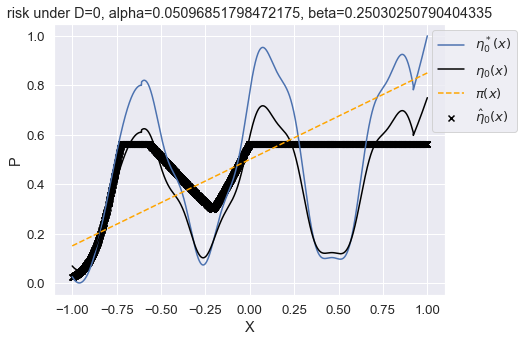

In [10]:
Y0_PDF = 'piecewise_sinusoid'
Y1_PDF = 'low_base_rate_sinusoid'
PI_PDF = 'linear'
do=0

expdf, _ = generate_syn_data(
    NS=10000,
    K=1,
    y0_pdf=Y0_PDF,
    y1_pdf=Y1_PDF,
    pi_pdf=PI_PDF,
)
debug_info = {
    'val_x': cosl['x'].squeeze(),
    'val_py': cosl['py_hat'].squeeze()
}
# debug_info = {
#     'val_x': x,
#     'val_py': py_hat
# }
sns.set(font_scale=1.2)
viz_ccpe_estimates(expdf, debug_info, error_params[f'alpha_{do}'][0],
                   error_params[f'beta_{do}'][0], do, Y0_PDF, Y1_PDF, PI_PDF)

In [28]:
expdf, error_params = generate_syn_data(
    NS=10000,
    K=1,
    y0_pdf=Y0_PDF,
    y1_pdf=Y1_PDF,
    pi_pdf=PI_PDF,
    error_min=0.2,
    error_max=0.2, 
    shuffle=True
)

split_ix = int(expdf.shape[0]*.7)
train_df, val_df = expdf.iloc[:split_ix,:], expdf.iloc[split_ix:,:]


# Train model
train_loader, val_loader = get_loaders(train_df, val_df, do=0, target='Y0', conditional=True)
model = MLP()

surrogate_params = {
    'alpha': 0.2,
    'beta': 0.2
}

# surrogate_params = {
#     'alpha': None,
#     'beta': None
# }

losses = train(model, target='Y0', train_loader=train_loader, error_params=surrogate_params, n_epochs=40)

# Evaluate on validation data
x, y, py_hat = evaluate(model, val_loader)
y_hat = np.zeros_like(y)
y_hat[py_hat > .5] = 1

TypeError: generate_syn_data() got an unexpected keyword argument 'error_min'